In [1]:
# @author : Dheeraj Kumar Pant
# @credits : Coursera, Kaggle(Data-Set)

import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-09-08 05:43:13--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 64.233.187.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/inception_v3_weigh 100%[===================>]  83.84M  36.7MB/s    in 2.3s    

2020-09-08 05:43:17 (36.7 MB/s) - ‘/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [4]:
path_inception ="/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

# Importing the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Creating an instance of the inception model from the local pre-trained weights
local_weights_file = path_inception

pre_trained_model =InceptionV3(input_shape=(220,220,3),include_top=False,weights=None) 
pre_trained_model.load_weights(local_weights_file)

# Making all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable=False

  
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 220, 220, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 109, 109, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 109, 109, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 109, 109, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [5]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


last layer output shape:  (None, 12, 12, 768)


In [6]:
# Callback class that stops training once accuracy reaches 97.0%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("\nReached 97.0% accuracy so cancelling training!")
      self.model.stop_training = True

      

In [7]:
from tensorflow.keras.optimizers import RMSprop,Adam

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# # A fully connected layer with 1,024 hidden units and ReLU activation
# x = layers.Dense(2048,activation='relu')(x)
# x = layers.Dropout(0.4)(x)     

x = layers.Dense(1024,activation='relu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(512,activation='relu')(x)
x = layers.Dropout(0.5)(x)

# x = layers.Dense(256,activation='relu')(x)
# x = layers.Dropout(0.5)(x)

x = layers.Dense(2, activation='softmax')(x)          

model = Model( pre_trained_model.input,x)

model.compile(optimizer = Adam(lr=0.001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 220, 220, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 109, 109, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 109, 109, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 109, 109, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [8]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [10]:
# from google.colab import drive
# # drive.mount('/content/gdrive')
# !unzip emotions.zip
# !kaggle datasets download -d ahmedmoorsy/facial-expression

# !kaggle datasets download -d manishshah120/facial-expression-recog-image-ver-of-fercdataset
# !kaggle datasets download -d datamunge/sign-language-mnist
# !kaggle datasets download -d mahmoudima/mma-facial-expression
# !kaggle datasets download -d prasunroy/natural-images
# !kaggle competitions download -c dogs-vs-cats
!kaggle datasets download -d tongpython/cat-and-dog

 92% 201M/218M [00:08<00:00, 19.4MB/s]
100% 218M/218M [00:08<00:00, 25.7MB/s]


In [12]:
!unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  inflating: training_set/training_set/cats/cat.3719.jpg  
  infl

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "training_set/training_set"
validation_dir = "test_set/test_set"

# Rescaling
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)# Your Code Here )

# Training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(# Your Code Here)
    train_dir,
    target_size=(220,220),
    batch_size=20,
    shuffle = True,
    class_mode='categorical')

# Validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( # Your Code Here)
    validation_dir,
    target_size=(220,220),
    batch_size=20,
    shuffle = True,
    class_mode='categorical')


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [16]:
# Iterates, and stops training at 97% accuracy

callbacks = myCallback()# Your Code Here
history = model.fit_generator(# Your Code Here (set epochs = 3))
                              train_generator,
                              epochs=20,
                              verbose=1,
                              callbacks=[callbacks],
                              validation_data=validation_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
401/401 [==============================] - 39s 97ms/step - loss: 0.6440 - accuracy: 0.9345 - val_loss: 0.0896 - val_accuracy: 0.9787
Epoch 2/20
401/401 [==============================] - ETA: 0s - loss: 0.1016 - accuracy: 0.9780
Reached 97.0% accuracy so cancelling training!
401/401 [==============================] - 38s 95ms/step - loss: 0.1016 - accuracy: 0.9780 - val_loss: 0.1328 - val_accuracy: 0.9807


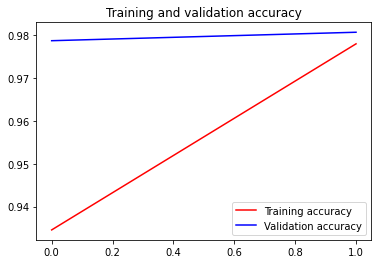

<Figure size 432x288 with 0 Axes>

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()